In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [506]:
df= pd.read_csv('day.csv')

In [507]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 1: Reading and understanding the data

In [508]:
df.shape # 730 records and 16 variables

(730, 16)

In [509]:
df.info() # there is no null record

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [510]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [511]:
# the column instant is just an index 
# dteday is the date which is already been captured in mnth and year columns
# casual and registered are already captured in cnt
df.drop(['instant','dteday','casual','registered'],axis =1,inplace =True) 

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [513]:
# seperating continuous and categorical variables
num_cols=['temp','atemp','hum', 'windspeed']
cat_col=['season','yr','mnth','holiday','workingday','weathersit','weekday']

In [514]:
for col in cat_col:  # to identify yes/no variables
    print(df[col].value_counts())
    print('\n')

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64


yr
0    365
1    365
Name: count, dtype: int64


mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64


holiday
0    709
1     21
Name: count, dtype: int64


workingday
1    499
0    231
Name: count, dtype: int64


weathersit
1    463
2    246
3     21
Name: count, dtype: int64


weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64




In [515]:
def value_mapper(col):
    if col.name == 'yr':
        return col.map({0:'2018',1:'2019'})
    elif col.name =='season':
        return col.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
    elif col.name == 'weekday':
        return col.map({0:'sun',1:'mon', 2:'tues', 3:'wed', 4:'thrus',5:'fri',6:'sat'})
    elif col.name == 'mnth':
        return col.map({1:'jan',2:'feb', 3:'march', 4:'april', 5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'act',11:'nov',12:'dec'})
    else:
        return col.map({1:'Clear/Partialy Cloudy', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain + Ice Pallets'})


In [516]:
#Mapping categorical variable from data dictionary
df[['yr','season','weathersit','weekday','mnth']]=df[['yr','season','weathersit','weekday','mnth']].apply(value_mapper)

In [517]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear/Partialy Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tues,1,Clear/Partialy Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear/Partialy Cloudy,9.305237,11.46350,43.6957,12.522300,1600


## EDA

/Users/payal/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


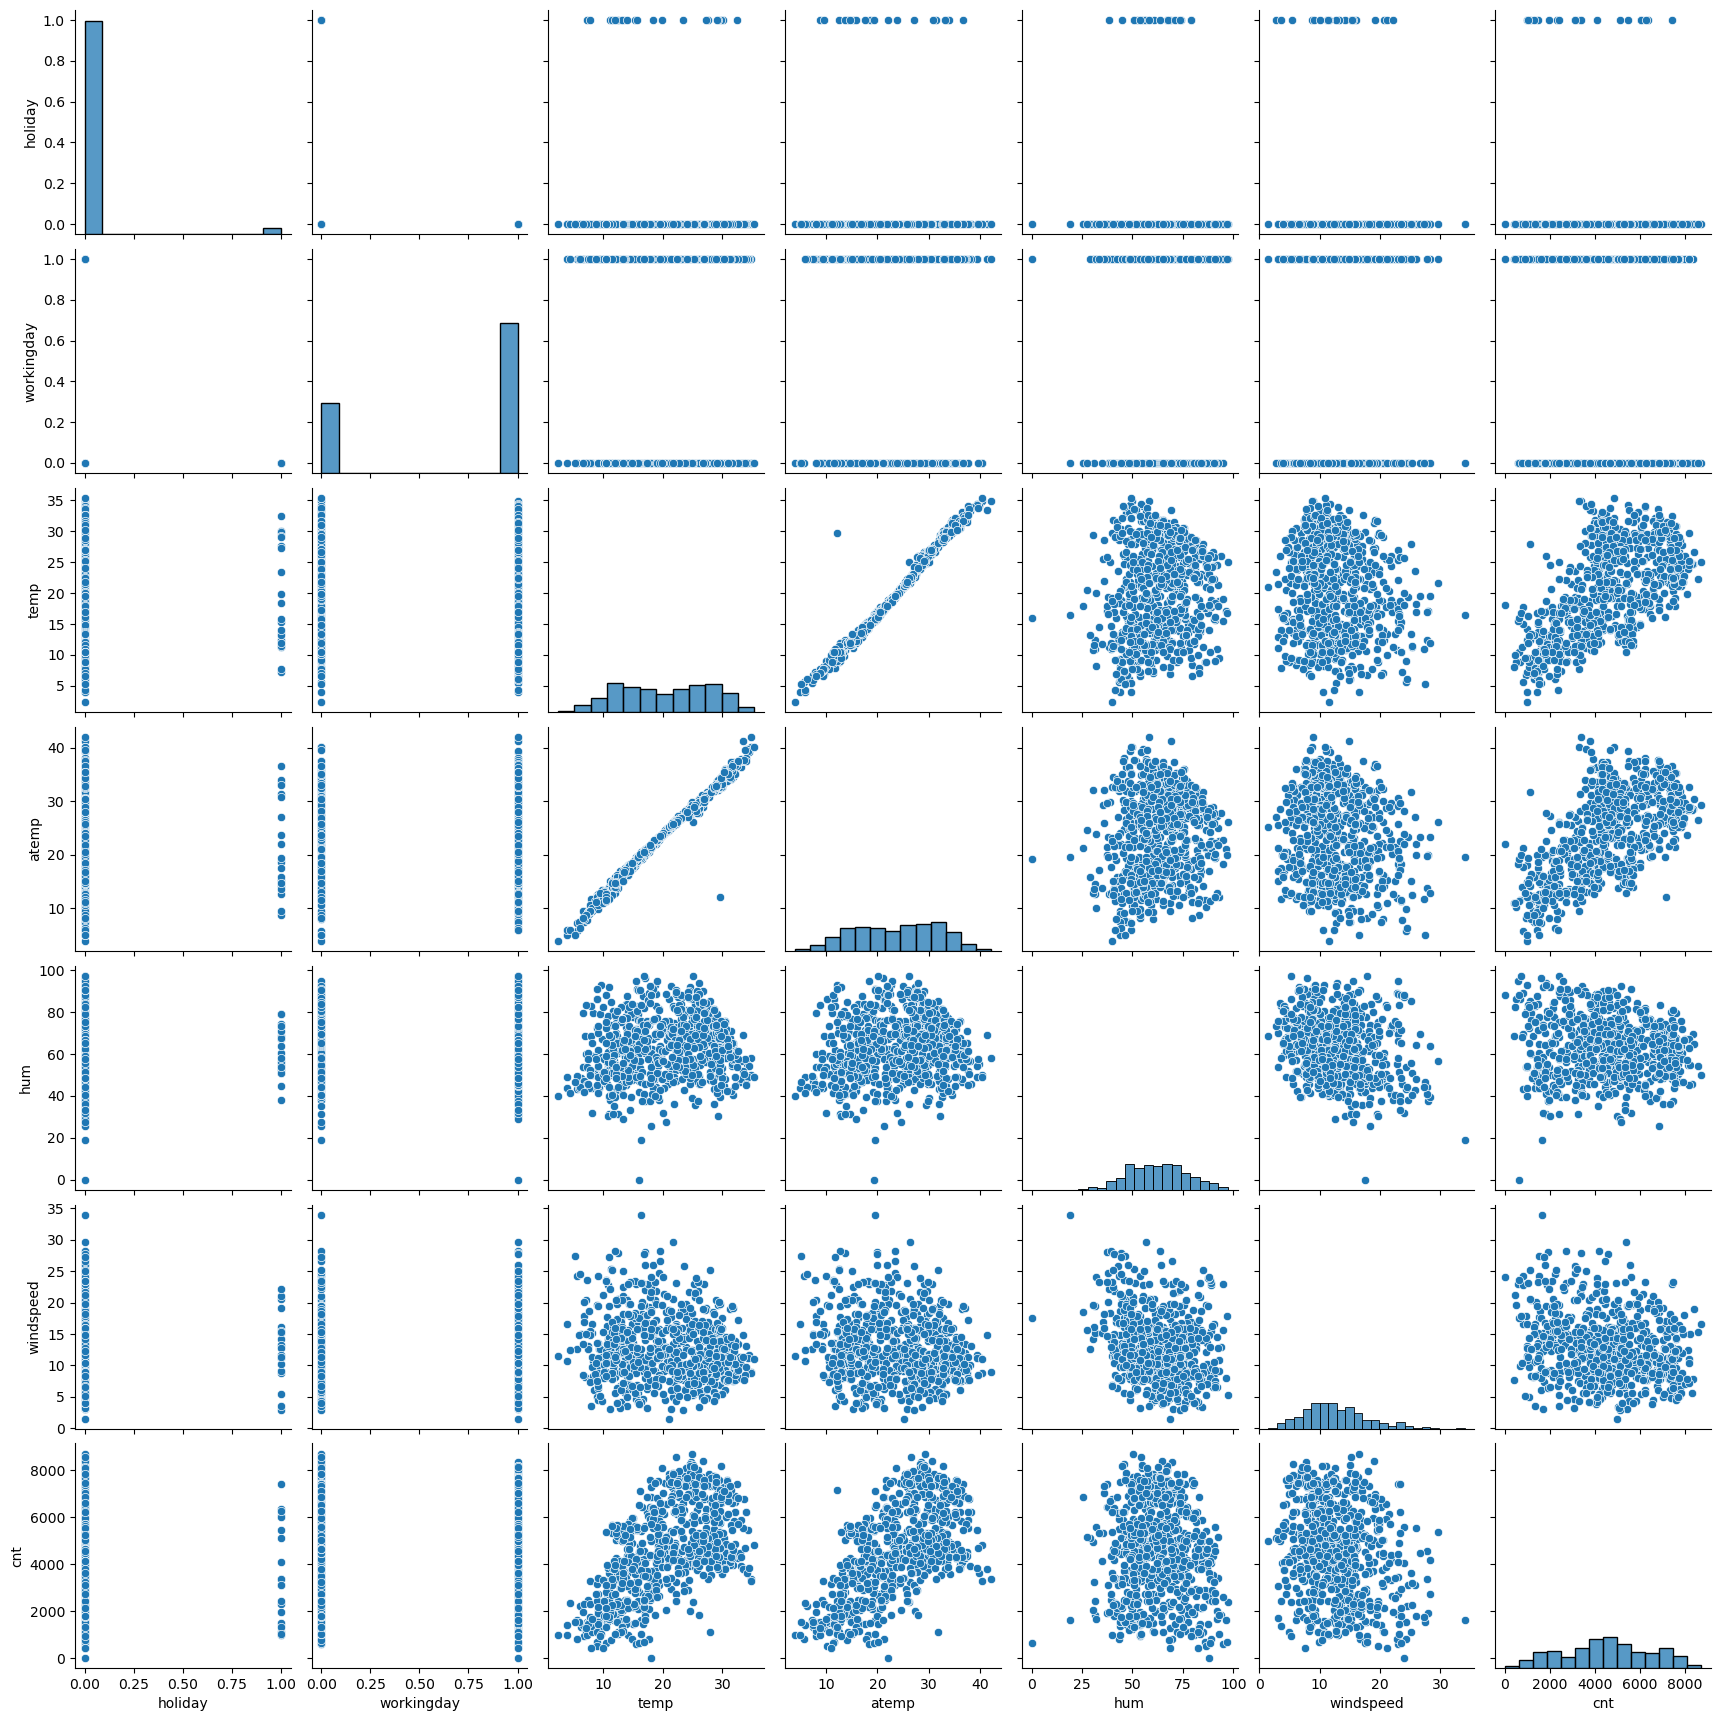

In [518]:
# visualizing the numerical data
sns.pairplot(df)
plt.show()

## Findings from numerical variables analysis
    - a linear relationship is seen between temp/atemp and cnt explaining some variance in data

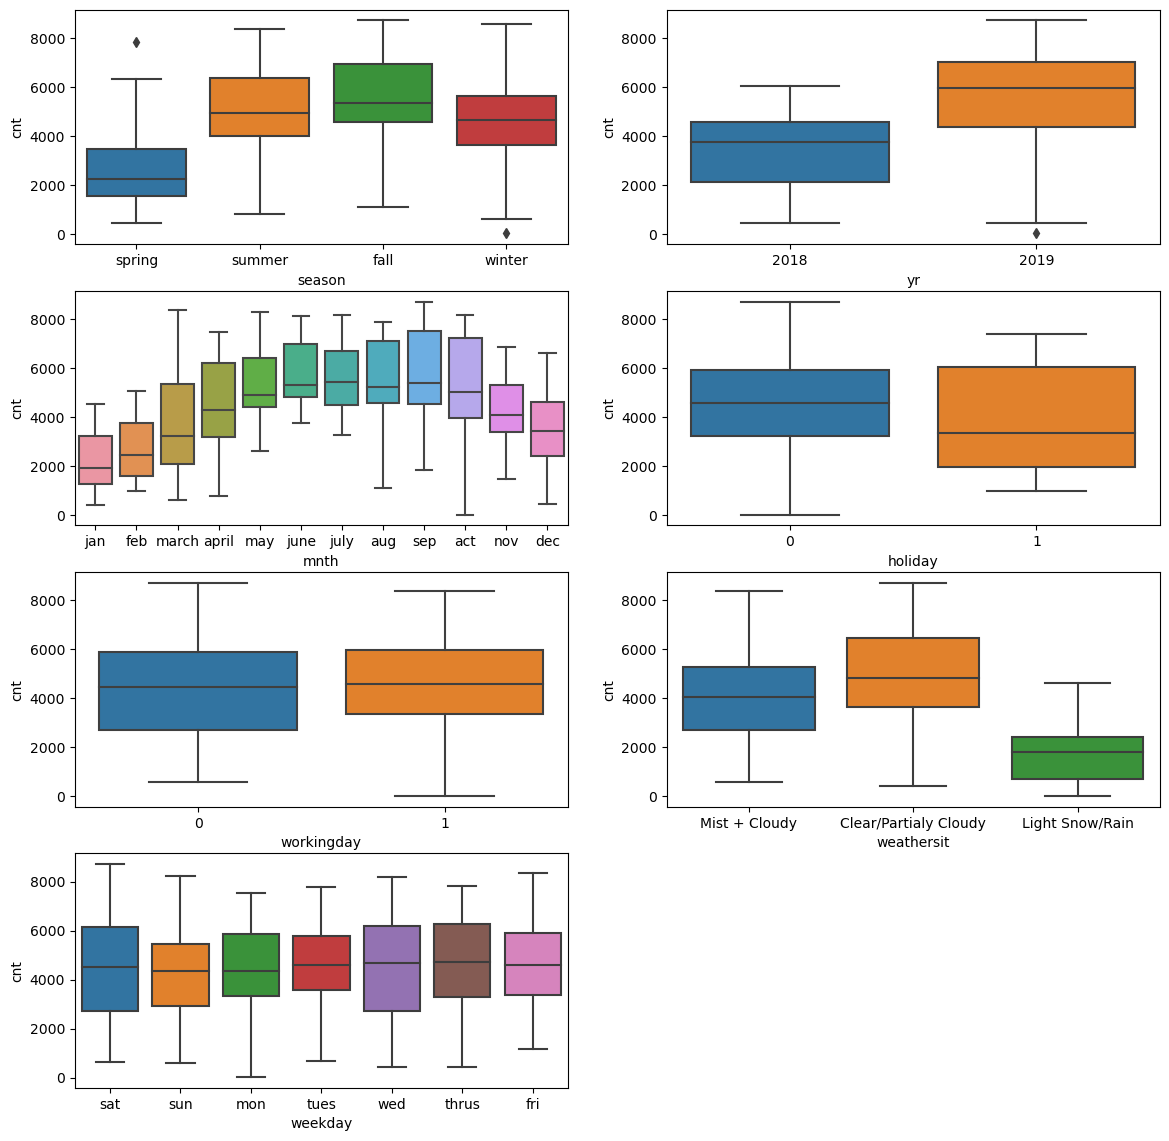

In [519]:
i=0
plt.figure(figsize=(14,14))
for col in cat_col:
    i+=1
    plt.subplot(4,2,i)
    sns.boxplot(y=df['cnt'],x=df[col])
plt.show()

## Findings from categorical variables analysis
    - the demand for bikes was least in the season of spring and high in summer and fall
    - 2019 saw considerably high demand as compared to 2018
    - the demand for bikes increases gradually from jan till september and then decreases 
    - demand on holidays is considerably lesser.
    - least demand of bikes in Light rain/snow weather condition

## Dummy Variables

In [520]:
cat_col.remove('holiday')
cat_col.remove('workingday')

In [521]:

for col in cat_col:
    status = pd.get_dummies(df[col],dtype=int,drop_first=True)
    df = pd.concat([df, status],axis=1)
    df.drop(col, axis=1,inplace =True)

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temp             730 non-null    float64
 3   atemp            730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    int64  
 8   summer           730 non-null    int64  
 9   winter           730 non-null    int64  
 10  2019             730 non-null    int64  
 11  april            730 non-null    int64  
 12  aug              730 non-null    int64  
 13  dec              730 non-null    int64  
 14  feb              730 non-null    int64  
 15  jan              730 non-null    int64  
 16  july             730 non-null    int64  
 17  june            

# Splitting the Data into Training and Testing Sets

In [523]:
import sklearn
from sklearn.model_selection import train_test_split

In [524]:
df_train,df_test=train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Scaling the numerical variables

In [525]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [526]:
num_cols.append("cnt")

In [527]:
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])

In [470]:
#df_train[['cnt']]=scaler.fit_transform(df_train[['cnt']])

In [528]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,nov,sep,Light Snow/Rain,Mist + Cloudy,mon,sat,sun,thrus,tues,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.086275,0.080392,0.029412,0.345098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.281045,0.272166,0.169124,0.475867,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

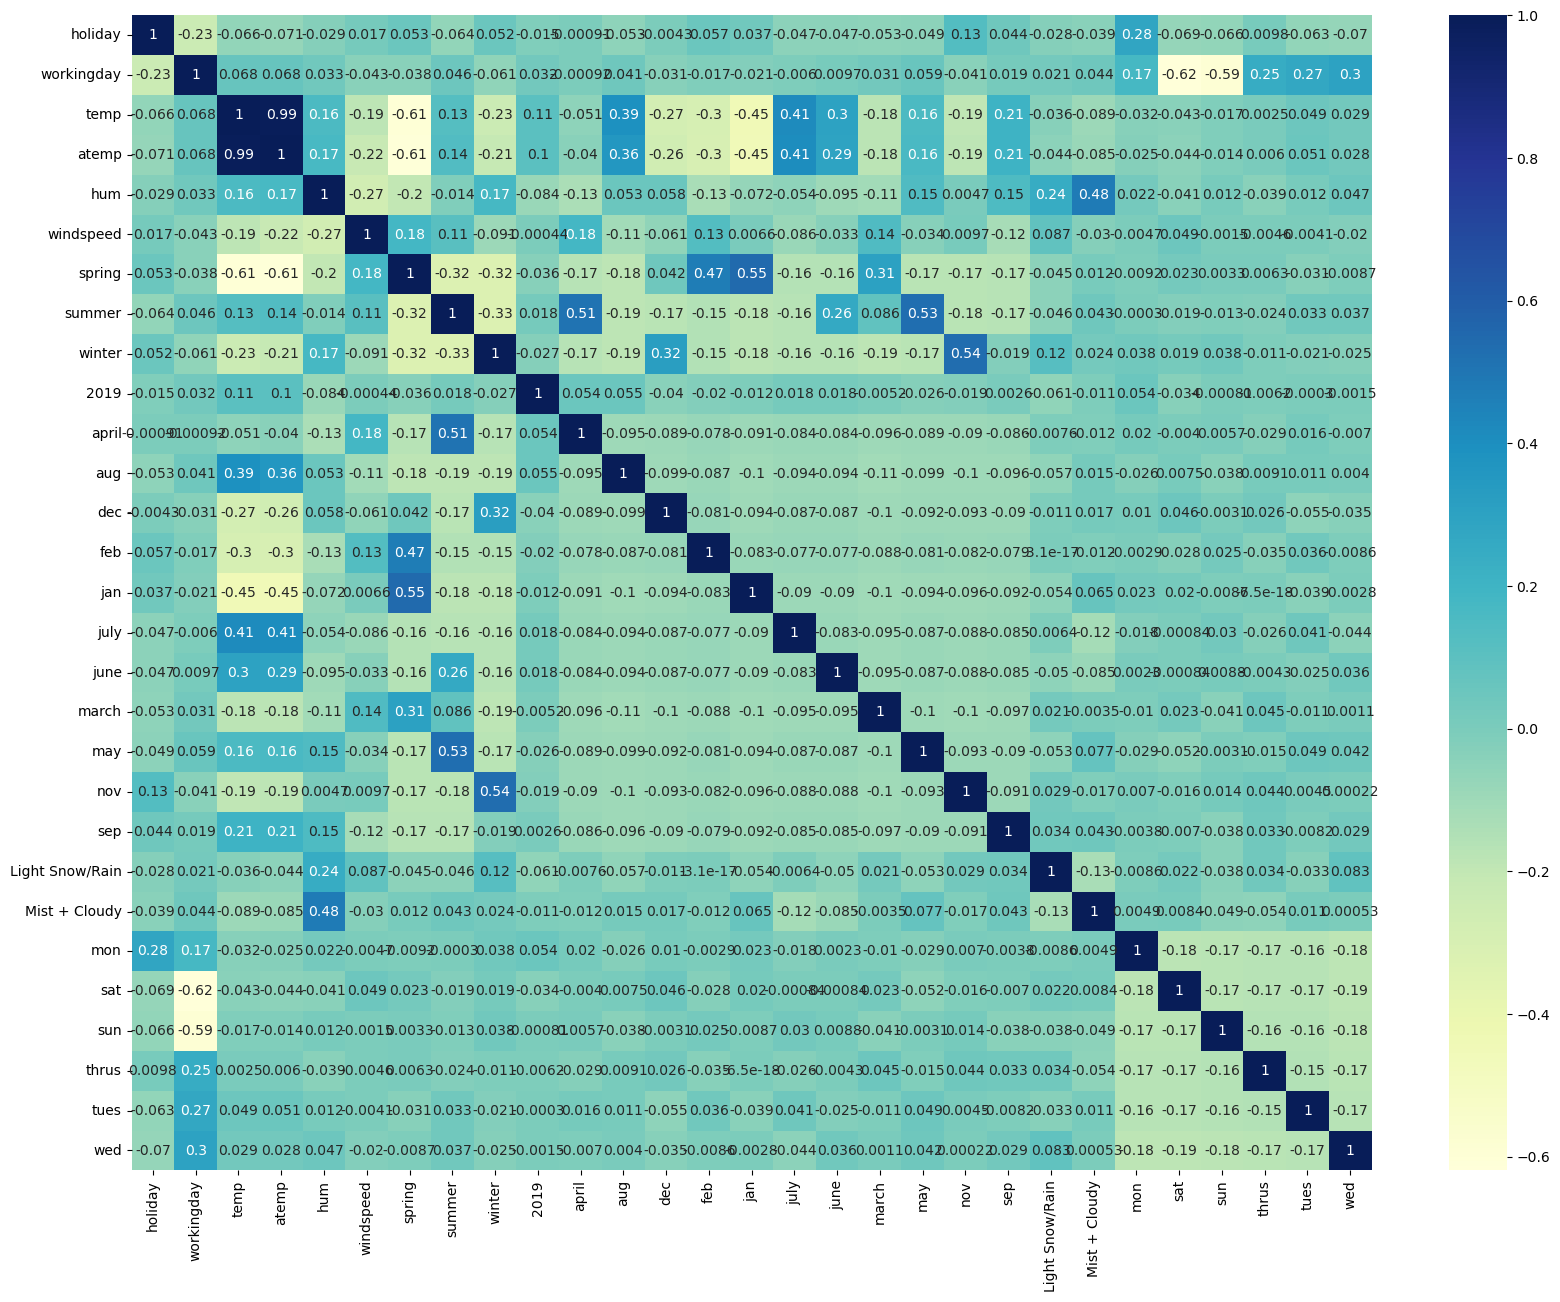

In [575]:
plt.figure(figsize=(20,15))

sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show

In [529]:
y_train = df_train.pop('cnt')
X_train= df_train


In [530]:
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,2019,...,nov,sep,Light Snow/Rain,Mist + Cloudy,mon,sat,sun,thrus,tues,wed
576,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
426,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Data Modelling


In [531]:
# Using  RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [532]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [533]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('2019', True, 1),
 ('april', False, 2),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('march', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('sep', True, 1),
 ('Light Snow/Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thrus', False, 2),
 ('tues', False, 2),
 ('wed', False, 2)]

In [534]:
rfe_col= X_train.columns[rfe.support_]
rfe_col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'winter',
       '2019', 'jan', 'sep', 'Light Snow/Rain', 'Mist + Cloudy', 'sat', 'sun'],
      dtype='object')

In [535]:
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'april', 'aug', 'dec', 'feb', 'july', 'june',
       'march', 'may', 'nov', 'mon', 'thrus', 'tues', 'wed'],
      dtype='object')

## Building a model with statsmodel with RFE Columns  for detailed stats

In [537]:
import statsmodels.api as sm

In [538]:
X_train_rfe = X_train[rfe_col]

X_train_rfe = sm.add_constant(X_train_rfe)

In [539]:
X_train_rfe.head()

,const,holiday,workingday,temp,atemp,hum,windspeed,winter,2019,jan,sep,Light Snow/Rain,Mist + Cloudy,sat,sun
576,1.0,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0
426,1.0,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,0,0,1,1,0
728,1.0,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,1
482,1.0,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,1,1,0
111,1.0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,0,0,1,0,0


In [540]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [541]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          9.40e-178
Time:                        00:40:16   Log-Likelihood:                 482.37
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     496   BIC:                            -877.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1821      0.024      7.492      0.000       0.134       0.230
holiday            -0.0258      0.022     -1.158      0.247      -0.070       0.018
workingday          0.0820      0.010      8.614      0.000       0.063       0.101
temp                0.4288      0.134      3.200      0.001       0.166       0.692
atemp               0.1118      0.143      0.782      0.434      -0.169       0.393
hum                -0.1382      0.040     -3.481      0.001      -0.216      -0.060
windspeed          -0.1729      0.027     -6.293      0.000      -0.227      -0.119
winter              0.0950      0.011      8.500      0.000       0.073       0.117
2019                0.2315      0.009     27.005      0.000       0.215       0.248
jan                -0.0769      0.018     -4.305      0.000      -0.112      -0.042
sep                 0.0768      0.016      4.782      0.000       0.045       0.108
Light Snow/Rain    -0.2524      0.028     -9.040      0.000      -0.307      -0.198
Mist + Cloudy      -0.0518      0.011     -4.677      0.000      -0.074      -0.030
sat                 0.0903      0.012      7.648      0.000       0.067       0.114
sun                 0.0355      0.012      2.861      0.004       0.011       0.060
==============================================================================
Omnibus:                       49.807   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.098
Skew:                          -0.580   Prob(JB):                     4.99e-22
Kurtosis:                       4.808   Cond. No.                     1.64e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`atemp` has high P value(> 0.05) thus seems `insignificant` in presence of other variables and can be dropped

In [542]:
X_train_new=X_train_rfe.drop(['atemp'],axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          8.95e-179
Time:                        00:40:31   Log-Likelihood:                 482.05
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1833      0.024      7.565      0.000       0.136       0.231
holiday            -0.0261      0.022     -1.173      0.241      -0.070       0.018
workingday          0.0825      0.009      8.694      0.000       0.064       0.101
temp                0.5319      0.024     21.762      0.000       0.484       0.580
hum                -0.1360      0.040     -3.437      0.001      -0.214      -0.058
windspeed          -0.1766      0.027     -6.521      0.000      -0.230      -0.123
winter              0.0957      0.011      8.599      0.000       0.074       0.118
2019                0.2314      0.009     27.012      0.000       0.215       0.248
jan                -0.0777      0.018     -4.358      0.000      -0.113      -0.043
sep                 0.0766      0.016      4.772      0.000       0.045       0.108
Light Snow/Rain    -0.2542      0.028     -9.139      0.000      -0.309      -0.200
Mist + Cloudy      -0.0521      0.011     -4.708      0.000      -0.074      -0.030
sat                 0.0908      0.012      7.706      0.000       0.068       0.114
sun                 0.0361      0.012      2.913      0.004       0.012       0.060
==============================================================================
Omnibus:                       48.313   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.208
Skew:                          -0.564   Prob(JB):                     2.12e-21
Kurtosis:                       4.791   Cond. No.                     1.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.82e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`holiday` has high P value(> 0.05) thus seems `insignificant` in presence of other variables and can be dropped

In [543]:
X_train_new=X_train_new.drop(['holiday'],axis =1)
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 17 Jan 2024   Prob (F-statistic):          8.95e-179
Time:                        00:40:38   Log-Likelihood:                 482.05
No. Observations:                 510   AIC:                            -938.1
Df Residuals:                     497   BIC:                            -883.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1572      0.039      3.988      0.000       0.080       0.235
workingday          0.1086      0.027      4.003      0.000       0.055       0.162
temp                0.5319      0.024     21.762      0.000       0.484       0.580
hum                -0.1360      0.040     -3.437      0.001      -0.214      -0.058
windspeed          -0.1766      0.027     -6.521      0.000      -0.230      -0.123
winter              0.0957      0.011      8.599      0.000       0.074       0.118
2019                0.2314      0.009     27.012      0.000       0.215       0.248
jan                -0.0777      0.018     -4.358      0.000      -0.113      -0.043
sep                 0.0766      0.016      4.772      0.000       0.045       0.108
Light Snow/Rain    -0.2542      0.028     -9.139      0.000      -0.309      -0.200
Mist + Cloudy      -0.0521      0.011     -4.708      0.000      -0.074      -0.030
sat                 0.1170      0.029      4.079      0.000       0.061       0.173
sun                 0.0622      0.029      2.159      0.031       0.006       0.119
==============================================================================
Omnibus:                       48.313   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.208
Skew:                          -0.564   Prob(JB):                     2.12e-21
Kurtosis:                       4.791   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

all the P Values are in acceptable range

## Calculating VIF

In [544]:
X_train_new.columns

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'winter', '2019',
       'jan', 'sep', 'Light Snow/Rain', 'Mist + Cloudy', 'sat', 'sun'],
      dtype='object')

In [545]:
X_train_new.drop('const', axis=1, inplace =True)

In [546]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [547]:
vif_df=pd.DataFrame()
vif_df['features']=X_train_new.columns
vif_df['VIF']= [vif(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif_df['VIF']=round(vif_df['VIF'],2)
vif_df=vif_df.sort_values(by='VIF',ascending=False)
vif_df

,features,VIF
2,hum,26.65
0,workingday,15.91
1,temp,10.81
10,sat,4.33
3,windspeed,4.28
11,sun,4.23
9,Mist + Cloudy,2.21
5,2019,2.07
4,winter,1.68
6,jan,1.49


In [548]:
X_train_new.drop('hum', axis=1, inplace =True)
vif_df=pd.DataFrame()
vif_df['features']=X_train_new.columns
vif_df['VIF']= [vif(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif_df['VIF']=round(vif_df['VIF'],2)
vif_df=vif_df.sort_values(by='VIF',ascending=False)
vif_df

,features,VIF
0,workingday,10.51
1,temp,8.48
2,windspeed,4.28
9,sat,3.18
10,sun,2.96
4,2019,2.06
8,Mist + Cloudy,1.57
3,winter,1.48
5,jan,1.40
6,sep,1.16


In [549]:
X_train_new.drop('workingday', axis=1, inplace =True)
vif_df=pd.DataFrame()
vif_df['features']=X_train_new.columns
vif_df['VIF']= [vif(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif_df['VIF']=round(vif_df['VIF'],2)
vif_df=vif_df.sort_values(by='VIF',ascending=False)
vif_df

,features,VIF
0,temp,3.68
1,windspeed,3.21
3,2019,2.03
7,Mist + Cloudy,1.50
2,winter,1.30
8,sat,1.21
9,sun,1.20
4,jan,1.18
5,sep,1.15
6,Light Snow/Rain,1.08


vif of the above variables are in acceptable range i.e below 5. these will be the final variables

In [550]:
X_train_final = X_train[X_train_new.columns]
X_train_final.head()

,temp,windspeed,winter,2019,jan,sep,Light Snow/Rain,Mist + Cloudy,sat,sun
576,0.815169,0.264686,0,1,0,0,0,0,0,0
426,0.442393,0.255342,0,1,0,0,0,1,1,0
728,0.245101,0.663106,0,1,0,0,0,0,0,1
482,0.395666,0.188475,0,1,0,0,0,1,1,0
111,0.345824,0.380981,0,0,0,0,0,1,0,0


In [551]:
LR = LinearRegression()
LR.fit(X_train_final, y_train)


LinearRegression()

In [566]:
LR.coef_

array([ 0.51595207, -0.15437328,  0.08572913,  0.23506654, -0.08304202,
        0.06867903, -0.28643758, -0.071893  ,  0.01420567, -0.04463515])

In [568]:
LR.intercept_

0.1844143602846946

In [552]:
y_train_pred =LR.predict(X_train_final)

# Residual analysis in Training Data set

/var/folders/vt/zh6l1p3j34d906_4mtw69cfw0000gn/T/ipykernel_2072/2630992260.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred))


Text(0.5, 0, 'Errors')

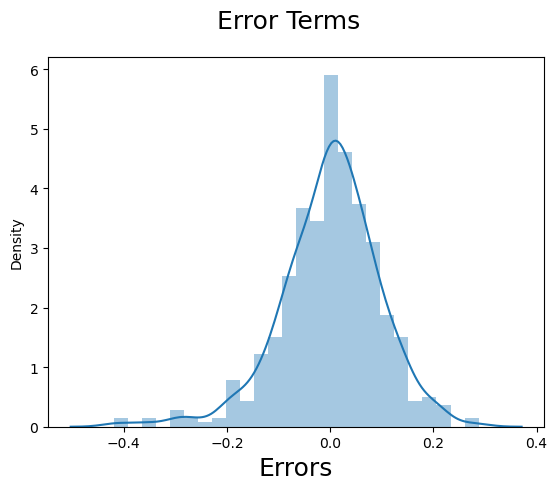

In [553]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

The mean of the error is zero thus the Linear Regression assumption is verifed 

# Making Predictions

<b> Applying scaling on test set

In [554]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,nov,sep,Light Snow/Rain,Mist + Cloudy,mon,sat,sun,thrus,tues,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [555]:
df_test[num_cols]=scaler.transform(df_test[num_cols])

#df_test[['cnt']]=scaler.transform(df_test[['cnt']])

In [556]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,nov,sep,Light Snow/Rain,Mist + Cloudy,mon,sat,sun,thrus,tues,wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.072727,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.260281,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [557]:
y_test=df_test.pop('cnt')
X_test =df_test

In [558]:
X_test_new=X_test[X_train_final.columns]

In [559]:
X_test_new.head()

,temp,windspeed,winter,2019,jan,sep,Light Snow/Rain,Mist + Cloudy,sat,sun
184,0.831783,0.084219,0,0,0,0,0,1,0,0
535,0.901354,0.153728,0,1,0,0,0,0,0,0
299,0.511964,0.334206,1,0,0,0,0,1,0,0
221,0.881625,0.339570,0,0,0,0,0,0,0,0
152,0.817246,0.537414,0,0,0,0,0,0,0,0


In [560]:
y_test_pred =LR.predict(X_test_new)

In [561]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [562]:
r2=r2_score(y_true=y_test, y_pred=y_test_pred)

In [563]:
r2

0.7685914331692753

# Model Evaluation

Text(0, 0.5, 'y_pred')

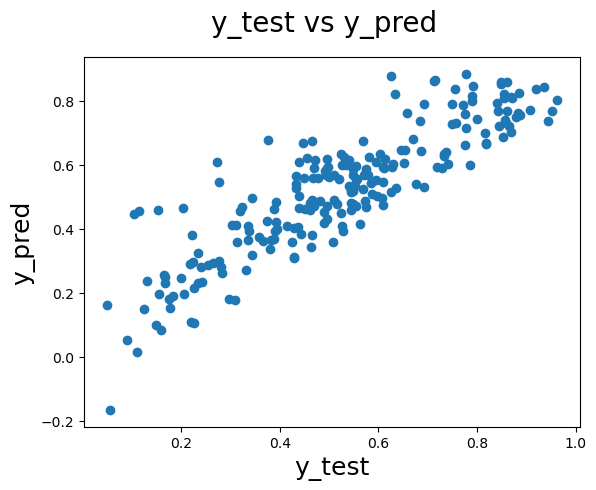

In [565]:
fig= plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)

The equation of best fitted line is<br> 
cnt = 0.184 + 0.516 x temp - 0.154 x windspeed + 0.086 x winter + 0.235 x '2019' - 0.083 x jan + 0.069 x sep - 0.286 x Light Snow/Rain - 0.072 x Mist + Cloudy +0.014 x sat - 0.045 x sun